# Titanic Project

 - Combine (train and test)

 - Data preparation

 - Split training data (train and test)

 - Algorithm selection

 - Training

 - Predict

 - Measure accuracy

 - Predict on test dataset

 - Submit your predictions to Kaggle

 - Rank in top 40%

## İmport paketlerini yüklüyorum 

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##   Datayı okuyorum  EDA

In [4]:
traindf=pd.read_csv('ttrain.csv')
testdf=pd.read_csv('ttest.csv')

In [5]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
combined_df = pd.concat([traindf, testdf], ignore_index=True)

In [7]:
combined_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
combined_df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
996,997,NaN,3,"Holthen, Mr. Johan Martin",male,28.0,0,0,C 4001,22.525,NaN,S


In [9]:
combined_df.shape

(1309, 12)

In [10]:
combined_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [12]:
combined_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
combined_df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

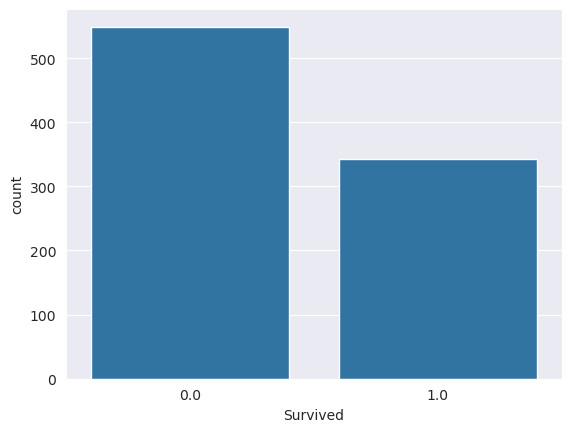

In [14]:
sns.countplot(x=combined_df['Survived']);

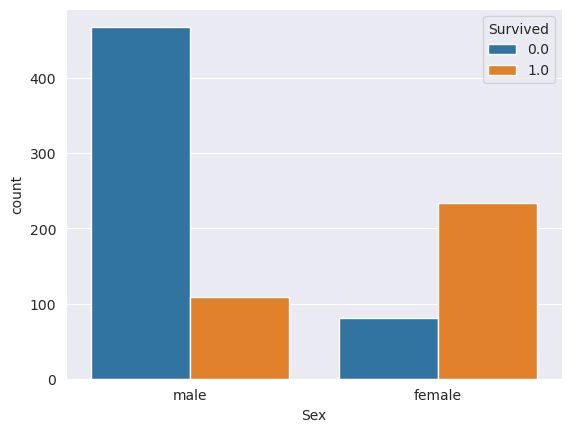

In [15]:
sns.countplot(x='Sex',data=combined_df,hue='Survived');

<Axes: xlabel='Pclass', ylabel='count'>

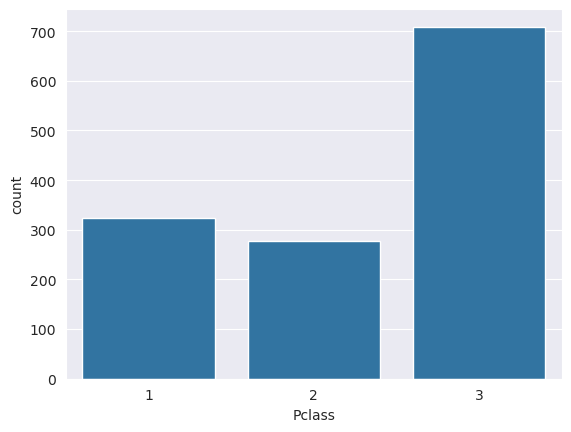

In [16]:
#HPclass sütunu sayım ;
sns.countplot(x='Pclass',data=combined_df)

<Axes: xlabel='Pclass', ylabel='count'>

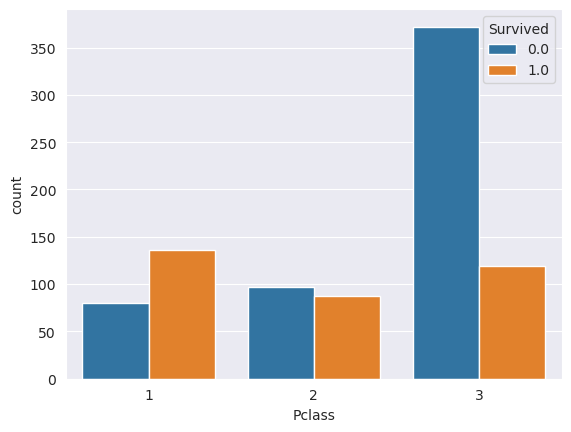

In [17]:
#Hayatta kalanların sayısı
sns.countplot(x='Pclass',data=combined_df,hue='Survived')

In [18]:
combined_df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [19]:
combined_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
traindf['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [21]:
#Sütunları dönüştürüyorum
combined_df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [22]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
combined_df['Age'] = imputer.fit_transform(combined_df[['Age']])


In [23]:
combined_df['Survived'] = combined_df['Survived'].interpolate()
combined_df['Fare'] = combined_df['Fare'].interpolate()
combined_df['Embarked'] = combined_df['Embarked'].interpolate()

In [24]:
#Önemsiz sütuları kaldırıyorum
combined_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [25]:
#NaN değerleri Bulma
nan_counts_by_column = combined_df.isna().sum()
print(nan_counts_by_column)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [26]:
combined_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,0,22.0,1,0,7.2500,0.0
1,1.0,1,1,38.0,1,0,71.2833,1.0
2,1.0,3,1,26.0,0,0,7.9250,0.0
3,1.0,1,1,35.0,1,0,53.1000,0.0
4,0.0,3,0,35.0,0,0,8.0500,0.0


In [27]:
x = combined_df.drop('Survived',axis=1)
y = combined_df.Survived

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
x.shape

(1309, 7)

In [30]:
from sklearn.naive_bayes import  GaussianNB
from sklearn.naive_bayes import  BernoulliNB

In [31]:
g=GaussianNB()
b=BernoulliNB()

In [32]:
g.fit(x_train,y_train)

GaussianNB()

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
gtahmin = g.predict(x_test)

In [35]:
accuracy_score(gtahmin,y_test)

0.7442748091603053

In [36]:
confusion_matrix(gtahmin,y_test)

array([[168,  46],
       [ 21,  27]])

<Axes: >

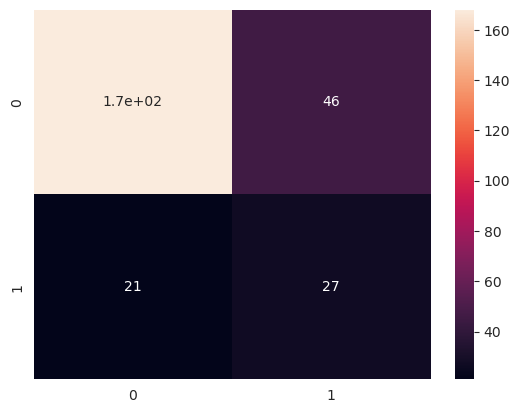

In [37]:
sns.heatmap(confusion_matrix(gtahmin,y_test),annot=True)

In [38]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.89      0.79      0.83       214
         1.0       0.37      0.56      0.45        48

    accuracy                           0.74       262
   macro avg       0.63      0.67      0.64       262
weighted avg       0.79      0.74      0.76       262



In [39]:
b.fit(x_train,y_train)

BernoulliNB()

In [40]:
btahmin = b.predict(x_test)

In [41]:
accuracy_score(btahmin,y_test)

0.7099236641221374

In [42]:
confusion_matrix(btahmin,y_test)

array([[160,  47],
       [ 29,  26]])

<Axes: >

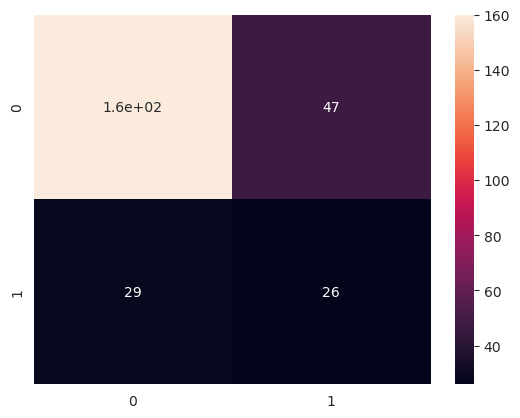

In [43]:
sns.heatmap(confusion_matrix(btahmin,y_test),annot=True)

In [44]:
print(classification_report(btahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81       207
         1.0       0.36      0.47      0.41        55

    accuracy                           0.71       262
   macro avg       0.60      0.62      0.61       262
weighted avg       0.74      0.71      0.72       262



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [46]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,2.503006e-01,3.881813e-01,2.919849e-01
KNeighborsRegressor,2.258841e-01,3.944519e-01,3.299855e-01
Linear,2.181948e-01,3.964061e-01,3.108722e-01
Ridge,2.181123e-01,3.964270e-01,3.111016e-01
mlp_regressor,1.619986e-01,4.104057e-01,3.143758e-01
AdaBoost,3.152859e-02,4.411989e-01,3.259542e-01
Lasso,-3.510141e-03,4.491092e-01,3.851268e-01
ElasticNet,-1.004469e-02,4.505690e-01,3.841748e-01
XGBRegressor,-7.383915e-02,4.645802e-01,3.202873e-01
SVR,-8.359079e-02,4.666848e-01,3.131910e-01
